<a href="https://colab.research.google.com/github/utpalrtw/Skillhigh/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Useful lib

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import and Loading Dataset

In [40]:
df = pd.read_csv('profile dataset.csv')
df.head()

,ID,Name,Age,City,Salary,Department
0,1,Bob,35.0,Austin,40000.0,NaN
1,2,Alice,55.0,Houston,40000.0,Finance
2,3,Eve,54.0,New York,90000.0,IT
3,4,David,36.0,Los Angeles,45000.0,Marketing
4,5,David,57.0,NaN,75000.0,HR


Now we see what we have inside our dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          105 non-null    int64  
 1   Name        105 non-null    object 
 2   Age         102 non-null    float64
 3   City        96 non-null     object 
 4   Salary      94 non-null     float64
 5   Department  81 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.1+ KB


In [29]:
df.shape

(105, 6)

In [50]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Salary'] = df['Salary'].astype('int')

we have missing value in our dataset

In [30]:
# check for duplicate data
df.duplicated().sum()

np.int64(5)

In [31]:
# we have 5 duplicate data, for better performans we drop duplicate data
df.drop_duplicates(inplace = True)  # inlace True insure that it removed from original dataset also

In [32]:
df.shape

(100, 6)

In [33]:
df.isnull().sum()

,0
ID,0
Name,0
Age,3
City,8
Salary,10
Department,22


Now we check, what to do with missing value ? Drop that raw ! or fill with mean, median or mode !

In [51]:
df_new = df.dropna(subset= ['Age']) # we have less column with miss age so we drop that particular raw. doing this we loss some info but it's only 2-3 raws so didn't impact much

df_new = df_new.fillna(df_new['City'].mode()[0]) # fill missing value with most frequent data

df_new = df_new.fillna(df_new['Department'].mode()[0])
df_new['Salary'] = df_new['Salary'].astype('int')
df_new['Salary'] = df_new['Salary'].fillna(df_new['Salary'].mean()) # fill mising value with mean

In [38]:
df_new.shape

(97, 6)

In [52]:
df_new.head()

,ID,Name,Age,City,Salary,Department
0,1,Bob,35.0,Austin,40000,Houston
1,2,Alice,55.0,Houston,40000,Finance
2,3,Eve,54.0,New York,90000,IT
3,4,David,36.0,Los Angeles,45000,Marketing
4,5,David,57.0,Houston,75000,HR


Now, let's look at the information and the first few rows of the cleaned dataset.

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          102 non-null    int64  
 1   Name        102 non-null    object 
 2   Age         102 non-null    float64
 3   City        102 non-null    object 
 4   Salary      102 non-null    int64  
 5   Department  102 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.6+ KB


In [54]:
display(df_new.head())

,ID,Name,Age,City,Salary,Department
0,1,Bob,35.0,Austin,40000,Houston
1,2,Alice,55.0,Houston,40000,Finance
2,3,Eve,54.0,New York,90000,IT
3,4,David,36.0,Los Angeles,45000,Marketing
4,5,David,57.0,Houston,75000,HR


To see outliers we plot boxplot

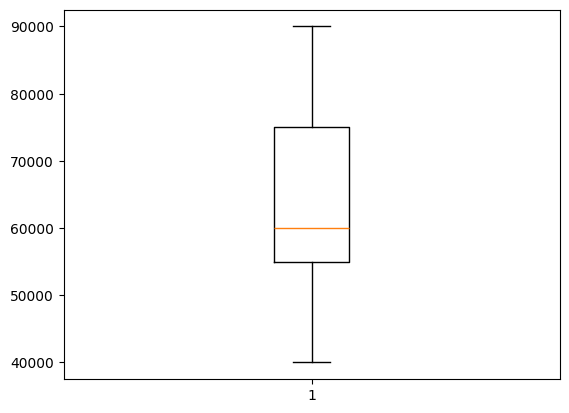

In [55]:
plt.boxplot(df_new['Salary'])
plt.show()

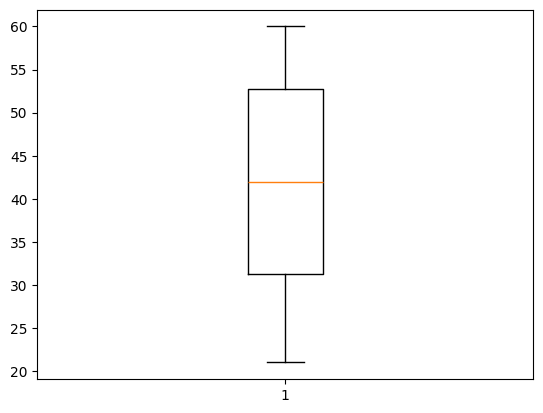

In [56]:
plt.boxplot(df_new['Age'])
plt.show()

in above dataset we don't have outliers